حملت الملف بعد ما عدلته زهد

In [13]:
import pandas as pd

# تحميل ملف تويتر)
twitter = pd.read_csv("twitter_standardized.csv")


عرضت معلومات البيانات

In [14]:
twitter.info()
twitter.describe()
twitter.isna().sum()
twitter.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Platform             90 non-null     object 
 1   URL                  90 non-null     object 
 2   Engagement           90 non-null     int64  
 3   Text                 90 non-null     object 
 4   Matched Keywords     90 non-null     object 
 5   toxicity_score       90 non-null     float64
 6   Label                90 non-null     int64  
 7   clean_text           90 non-null     object 
 8   word_count           90 non-null     int64  
 9   negative_word_count  90 non-null     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 7.2+ KB


np.int64(0)

انظف البيانات المفقودةاذا النص فاضي احذفها اما الباقين لا املاها قيم ي ٠ ي قيمة منطقية

In [15]:
# نحذف فقط إذا النص نفسه فاضي
twitter = twitter.dropna(subset=["Text"])

# نملأ باقي القيم المفقودة بصفر أو قيمة منطقية
twitter["Engagement"] = twitter["Engagement"].fillna(0)
twitter["toxicity_score"] = twitter["toxicity_score"].fillna(twitter["toxicity_score"].mean())
twitter["negative_word_count"] = twitter["negative_word_count"].fillna(0)
twitter["Label"] = twitter["Label"].fillna("Unknown")
twitter.head()


,Platform,URL,Engagement,Text,Matched Keywords,toxicity_score,Label,clean_text,word_count,negative_word_count
0,Twitter,https://twitter.com/user/status/19701368662560...,130,RT @MikeCrispi: LIVE on the ground outside the...,[],0.020658,0,rt live ground outside first new jersey gubern...,12,0
1,Twitter,https://twitter.com/user/status/19701368661218...,1088,RT @AdamMoczar: ⚡🇺🇲 Charlie Kirk: “Islam is NO...,['Muslims'],0.125268,0,rt ⚡ charlie kirk “islam compatible west impor...,13,0
2,Twitter,https://twitter.com/user/status/19701368656481...,1219,RT @aldamu_jo: Israeli police clashed with ult...,['Jews'],0.013052,0,rt israeli police clashed ultraorthodox jews r...,14,0
3,Twitter,https://twitter.com/user/status/19701368656229...,1151,RT @AzatAlsalim: A Hijabi woman tells a 'Gay f...,[],0.426302,0,rt hijabi woman tells gay palestine welcome pr...,12,0
4,Twitter,https://twitter.com/user/status/19701368655431...,0,@ScotGovFM @JohnSwinney @PalMissionUK Absolute...,['shameful'],0.018147,0,absolutely shameful recognition whilst one hos...,7,0


نحذف التكرارات

In [16]:
twitter = twitter.drop_duplicates(subset=["Text", "URL"])


راح ننظف النص ونشيل الاشياء الغريبة (روابط ، رموز غريبه ، فراغات زايدة منشت او هاشتاق )

In [17]:
import re

def clean_text_func(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)          # إزالة الروابط
    text = re.sub(r"[@#]\w+", "", text)          # إزالة المنشن والهاشتاق
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)   # إزالة الرموز الغريبة
    text = re.sub(r"\s+", " ", text).strip()     # إزالة الفراغات الزائدة
    return text

twitter["clean_text"] = twitter["Text"].apply(clean_text_func)
twitter.head()

,Platform,URL,Engagement,Text,Matched Keywords,toxicity_score,Label,clean_text,word_count,negative_word_count
0,Twitter,https://twitter.com/user/status/19701368662560...,130,RT @MikeCrispi: LIVE on the ground outside the...,[],0.020658,0,rt live on the ground outside the first new je...,12,0
1,Twitter,https://twitter.com/user/status/19701368661218...,1088,RT @AdamMoczar: ⚡🇺🇲 Charlie Kirk: “Islam is NO...,['Muslims'],0.125268,0,rt charlie kirk islam is not compatible with t...,13,0
2,Twitter,https://twitter.com/user/status/19701368656481...,1219,RT @aldamu_jo: Israeli police clashed with ult...,['Jews'],0.013052,0,rt israeli police clashed with ultraorthodox j...,14,0
3,Twitter,https://twitter.com/user/status/19701368656229...,1151,RT @AzatAlsalim: A Hijabi woman tells a 'Gay f...,[],0.426302,0,rt a hijabi woman tells a gay for palestine th...,12,0
4,Twitter,https://twitter.com/user/status/19701368655431...,0,@ScotGovFM @JohnSwinney @PalMissionUK Absolute...,['shameful'],0.018147,0,absolutely shameful no recognition whilst one ...,7,0


ترميز التصنيفات (Label Encoding)

نراعي احتمال وجود كلمات مختلفة (Hate, hate speech, non-hate, neutral, unknown...).

In [18]:
twitter["Label"] = twitter["Label"].replace({
    "Hate": 1, "hate": 1, "Hate Speech": 1,
    "Non-Hate": 0, "non hate": 0, "Not Hate": 0,
    "Neutral": 0, "Unknown": 0
})
twitter.head()

,Platform,URL,Engagement,Text,Matched Keywords,toxicity_score,Label,clean_text,word_count,negative_word_count
0,Twitter,https://twitter.com/user/status/19701368662560...,130,RT @MikeCrispi: LIVE on the ground outside the...,[],0.020658,0,rt live on the ground outside the first new je...,12,0
1,Twitter,https://twitter.com/user/status/19701368661218...,1088,RT @AdamMoczar: ⚡🇺🇲 Charlie Kirk: “Islam is NO...,['Muslims'],0.125268,0,rt charlie kirk islam is not compatible with t...,13,0
2,Twitter,https://twitter.com/user/status/19701368656481...,1219,RT @aldamu_jo: Israeli police clashed with ult...,['Jews'],0.013052,0,rt israeli police clashed with ultraorthodox j...,14,0
3,Twitter,https://twitter.com/user/status/19701368656229...,1151,RT @AzatAlsalim: A Hijabi woman tells a 'Gay f...,[],0.426302,0,rt a hijabi woman tells a gay for palestine th...,12,0
4,Twitter,https://twitter.com/user/status/19701368655431...,0,@ScotGovFM @JohnSwinney @PalMissionUK Absolute...,['shameful'],0.018147,0,absolutely shameful no recognition whilst one ...,7,0


تطبيع القيم الرقمية (Normalization)

نطبع فقط الأعمدة العددية الرئيسية.
ما نحذف القيم المتطرفة، فقط نعيد مقياسها بين 0 و 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["Engagement", "toxicity_score", "word_count", "negative_word_count"]
twitter[num_cols] = scaler.fit_transform(twitter[num_cols])


فلترة النصوص حسب الطول

نخفف الشرط: ما نحذف إلا التغريدات اللي عدد كلماتها صفر أو أكثر من 300.

In [20]:
twitter = twitter[(twitter["word_count"] > 0) & (twitter["word_count"] < 300)]


ملخص سريع

In [21]:
summary = {
    "final_shape": twitter.shape,
    "missing_values_after": twitter.isna().sum().to_dict(),
    "duplicates_after": twitter.duplicated(subset=["Text", "URL"]).sum(),
}
summary
twitter.to_csv("twitter_cleaned.csv", index=False)


EDA for Twitter Dataset

In [22]:
# ---------------------------------------------------
# 🧩 STEP 1: Import Libraries and Load the Data
# ---------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات المنظّفة
df = pd.read_csv("twitter_cleaned.csv")

# عرض أول 5 صفوف للتأكد من التحميل
print("🔹 First 5 rows:")
print(df.head())


🔹 First 5 rows:
  Platform                                                URL  Engagement  \
0  Twitter  https://twitter.com/user/status/19701368662560...    0.003424   
1  Twitter  https://twitter.com/user/status/19701368661218...    0.028659   
2  Twitter  https://twitter.com/user/status/19701368656481...    0.032110   
3  Twitter  https://twitter.com/user/status/19701368656229...    0.030319   
4  Twitter  https://twitter.com/user/status/19701368655431...    0.000000   

                                                Text Matched Keywords  \
0  RT @MikeCrispi: LIVE on the ground outside the...               []   
1  RT @AdamMoczar: ⚡🇺🇲 Charlie Kirk: “Islam is NO...      ['Muslims']   
2  RT @aldamu_jo: Israeli police clashed with ult...         ['Jews']   
3  RT @AzatAlsalim: A Hijabi woman tells a 'Gay f...               []   
4  @ScotGovFM @JohnSwinney @PalMissionUK Absolute...     ['shameful']   

   toxicity_score  Label                                         clean_text  \
0  

In [23]:
# ---------------------------------------------------
# 📊 STEP 2: Basic Overview (Getting to Know the Data)
# ---------------------------------------------------
print("\n📘 Dataset Info:")
df.info()

print("\n📏 Dataset Shape:", df.shape)
print("\n📋 Column Names:", list(df.columns))



📘 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Platform             89 non-null     object 
 1   URL                  89 non-null     object 
 2   Engagement           89 non-null     float64
 3   Text                 89 non-null     object 
 4   Matched Keywords     89 non-null     object 
 5   toxicity_score       89 non-null     float64
 6   Label                89 non-null     int64  
 7   clean_text           88 non-null     object 
 8   word_count           89 non-null     float64
 9   negative_word_count  89 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.1+ KB

📏 Dataset Shape: (89, 10)

📋 Column Names: ['Platform', 'URL', 'Engagement', 'Text', 'Matched Keywords', 'toxicity_score', 'Label', 'clean_text', 'word_count', 'negative_word_count']


In [24]:
# ---------------------------------------------------
# 📈 STEP 3: Descriptive Statistics (Non-Graphical Univariate EDA)
# ---------------------------------------------------
print("\n📊 Summary Statistics for Numerical Columns:")
print(df.describe())

print("\n📊 Value Counts for Label Column:")
print(df["Label"].value_counts())



📊 Summary Statistics for Numerical Columns:
       Engagement  toxicity_score      Label  word_count  negative_word_count
count   89.000000       89.000000  89.000000   89.000000            89.000000
mean     0.038122        0.283669   0.269663    0.396883             0.078652
std      0.139327        0.350711   0.446299    0.211273             0.197985
min      0.000000        0.000000   0.000000    0.032258             0.000000
25%      0.000000        0.017189   0.000000    0.290323             0.000000
50%      0.001185        0.060848   0.000000    0.354839             0.000000
75%      0.030319        0.528027   1.000000    0.451613             0.000000
max      1.000000        1.000000   1.000000    1.000000             1.000000

📊 Value Counts for Label Column:
Label
0    65
1    24
Name: count, dtype: int64


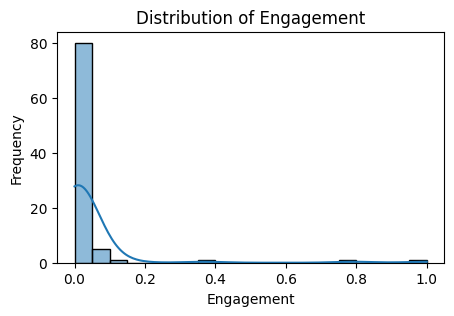

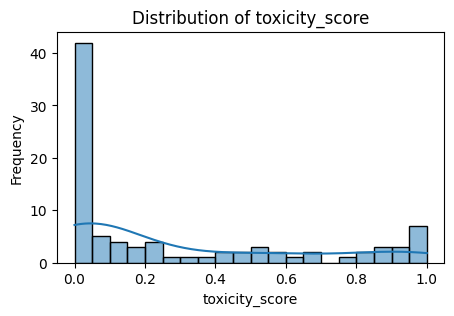

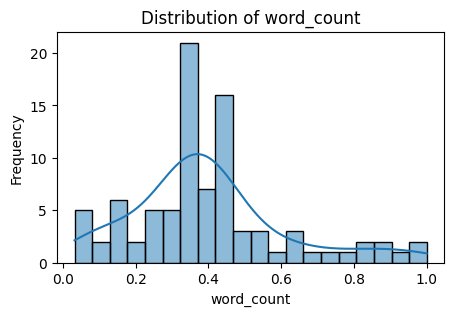

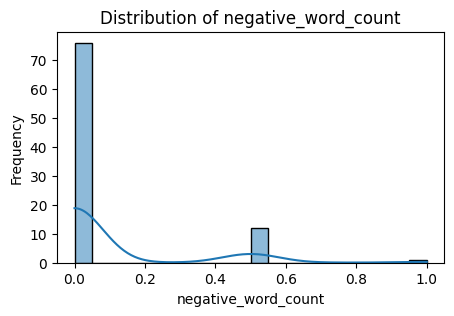

In [25]:
# ---------------------------------------------------
# 🎨 STEP 4: Visualize Numeric Distributions (Histograms)
# ---------------------------------------------------
numeric_cols = ["Engagement", "toxicity_score", "word_count", "negative_word_count"]

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


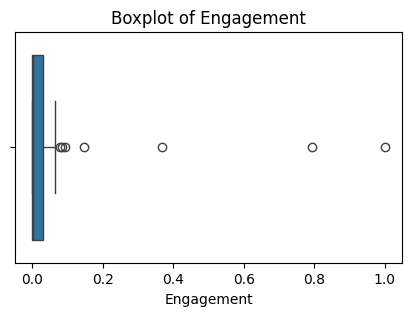

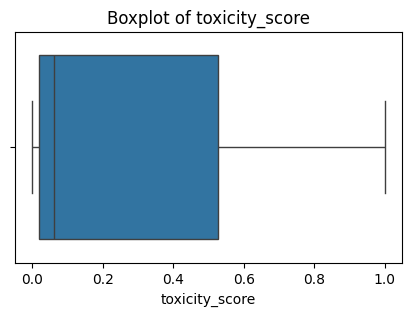

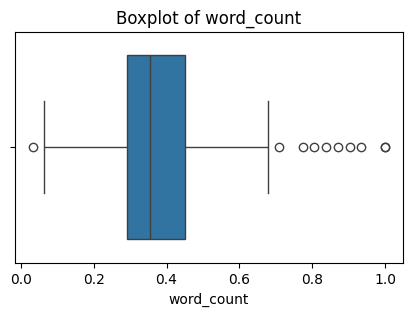

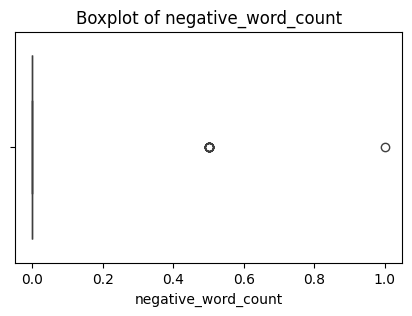

In [26]:
# ---------------------------------------------------
# 📦 STEP 5: Detect Outliers (Boxplots)
# ---------------------------------------------------
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


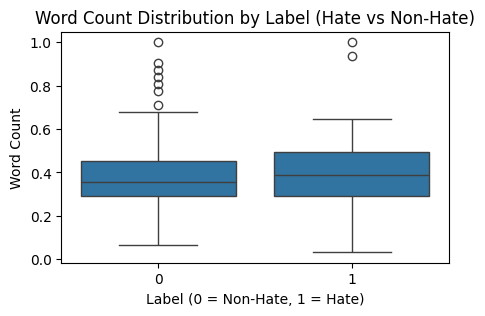

In [27]:
# ---------------------------------------------------
# ⚖️ STEP 6: Categorical vs Quantitative (Boxplot by Label)
# ---------------------------------------------------
plt.figure(figsize=(5,3))
sns.boxplot(x='Label', y='word_count', data=df)
plt.title("Word Count Distribution by Label (Hate vs Non-Hate)")
plt.xlabel("Label (0 = Non-Hate, 1 = Hate)")
plt.ylabel("Word Count")
plt.show()


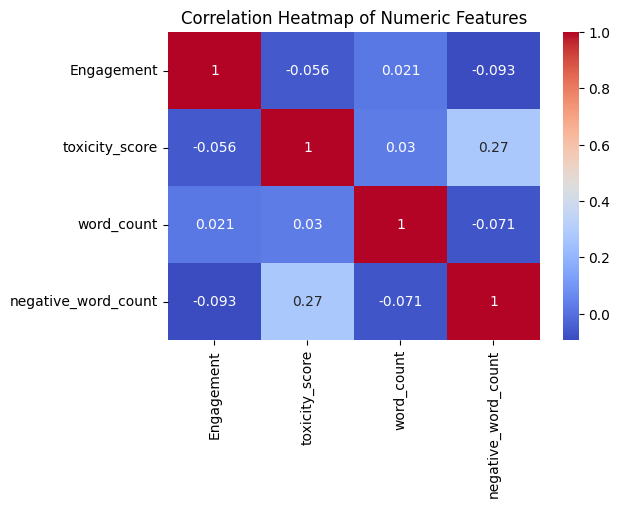

In [28]:
# ---------------------------------------------------
# 🔗 STEP 7: Correlation Analysis (Bivariate EDA)
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


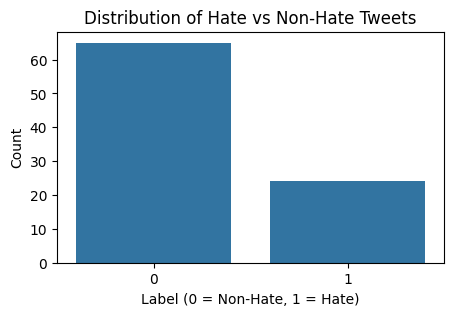

In [29]:
# ---------------------------------------------------
# 📊 STEP 8: Label Distribution Visualization
# ---------------------------------------------------
plt.figure(figsize=(5,3))
sns.countplot(x="Label", data=df)
plt.title("Distribution of Hate vs Non-Hate Tweets")
plt.xlabel("Label (0 = Non-Hate, 1 = Hate)")
plt.ylabel("Count")
plt.show()
